# HW2: Application Questions

CS 539 Machine Learning

Aukkawut Ammartayakun

In [2]:
#import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd

## 1. Linear Regression Problem (25 points)

We will use the Real estate valuation data set.xlsx dataset to 
build different regression models. The dataset includes 6 predictors, and one response variable. In the 
dataset, X1 represents the transaction date; find the earliest transaction date and set that as a reference 
time – ie, subtract that from all transaction dates. 

(1) Visualize the dataset; visualization step includes (not limited) to: a) histogram of individual predictors and response, and b) scatter plots for pairs of predictors and also pairs of predictor and response variable. Discuss you observation on possible outlier data points, and possible predictive 
power (correlation). 

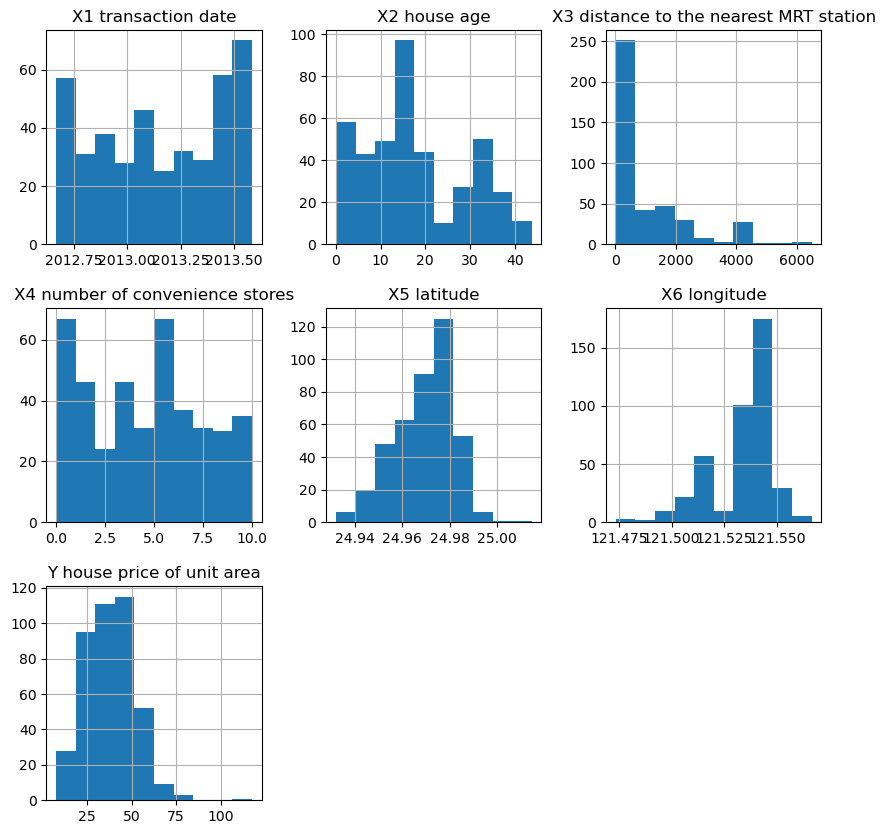

In [10]:
#read xlsx file
data = pd.read_excel('Real estate valuation data set.xlsx', index_col=0)
#histogram of individual variables
data.hist(figsize=(10,10))
plt.show()

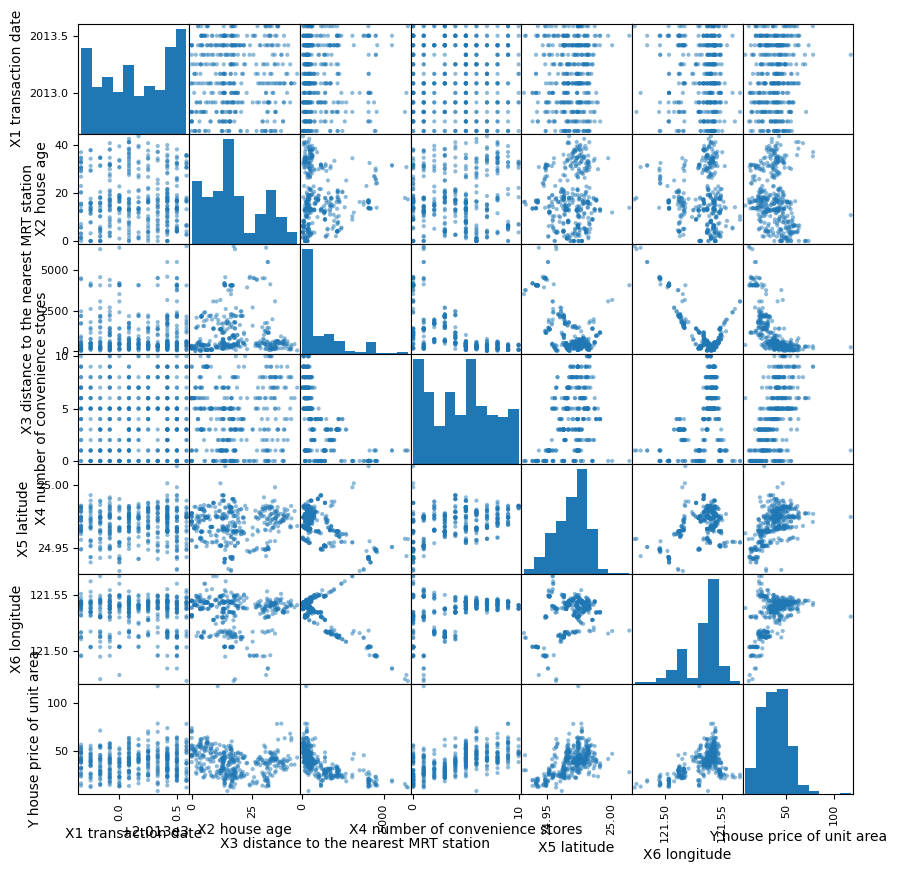

In [7]:
#scatter plot for each pair of variables
pd.plotting.scatter_matrix(data, figsize=(10,10))
plt.show()

In [8]:
#correlation matrix
data.corr()

X1 transaction date  X2 house age  \
X1 transaction date                                1.000000      0.017542   
X2 house age                                       0.017542      1.000000   
X3 distance to the nearest MRT station             0.060880      0.025622   
X4 number of convenience stores                    0.009544      0.049593   
X5 latitude                                        0.035016      0.054420   
X6 longitude                                      -0.041065     -0.048520   
Y house price of unit area                         0.087529     -0.210567   

                                        X3 distance to the nearest MRT station  \
X1 transaction date                                                   0.060880   
X2 house age                                                          0.025622   
X3 distance to the nearest MRT station                                1.000000   
X4 number of convenience stores                                      -0.602519   
X5 latitude                                                          -0.591067   
X6 longitude                                                         -0.806317   
Y house price of unit area                                           -0.673613   

                                        X4 number of convenience stores  \
X1 transaction date                                            0.009544   
X2 house age                                                   0.049593   
X3 distance to the nearest MRT station                        -0.602519   
X4 number of convenience stores                                1.000000   
X5 latitude                                                    0.444143   
X6 longitude                                                   0.449099   
Y house price of unit area                                     0.571005   

                                        X5 latitude  X6 longitude  \
X1 transaction date                        0.035016     -0.041065   
X2 house age                               0.054420     -0.048520   
X3 distance to the nearest MRT station    -0.591067     -0.806317   
X4 number of convenience stores            0.444143      0.449099   
X5 latitude                                1.000000      0.412924   
X6 longitude                               0.412924      1.000000   
Y house price of unit area                 0.546307      0.523287   

                                        Y house price of unit area  
X1 transaction date                                       0.087529  
X2 house age                                             -0.210567  
X3 distance to the nearest MRT station                   -0.673613  
X4 number of convenience stores                           0.571005  
X5 latitude                                               0.546307  
X6 longitude                                              0.523287  
Y house price of unit area                                1.000000

(2) Build a linear regression model using all of predictors (no basis function) and discuss your model outcome (predicted weights, price as a function of time, and RMSE). 

In [10]:
#linear regression with all variables
def linear_regression(x, y):
    '''
    This function performs linear regression on the given data
    Input: x - matrix of independent variables where each row is a data point
    y - vector of predicted variable
    Output: beta - vector of regression coefficients
    '''
    #add a column of ones to x
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    #compute beta
    beta = np.linalg.inv(x.T @ x) @ x.T @ y
    return beta

def RMSE(x, y, beta):
    '''
    This function computes the root mean squared error of the linear regression
    Input: x - matrix of independent variables where each row is a data point
    y - vector of predicted variable
    beta - vector of regression coefficients
    Output: rmse - root mean squared error
    '''
    #add a column of ones to x
    x = np.hstack((np.ones((x.shape[0], 1)), x))
    #compute rmse
    rmse = np.sqrt(np.sum((y - x @ beta)**2)/x.shape[0])
    return rmse

#perform the regression
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
beta = linear_regression(x, y)
print('Regression equation: y = ', beta[0], ' + ', beta[1], 'x1 + ', beta[2], 'x2 + ', beta[3], 'x3 + ', beta[4], 'x4 + ', beta[5], 'x5 + ', beta[6], 'x6')
print('RMSE: ', RMSE(x, y, beta))



Regression equation: y =  -14441.984771508674  +  5.149017273800987 x1 +  -0.2696967341110219 x2 +  -0.004487508086205817 x3 +  1.1333249843804976 x4 +  225.4701444568154 x5 +  -12.429045575450473 x6
RMSE:  8.782312975361176


(3) Build a Bayesian regression model using all of predictors (no basis function) and discuss your 
model outcomes (predicted weights and their confidence interval, prediction of response variable 
for the training set and their confidence interval). Build the model for different values of $\lambda = \frac{\alpha}{\beta}$ -- here, you can pick: $\lambda_1=1$, $\lambda_2 = 10$, and $\lambda_3 =100$. 

In [42]:
def bayesian_regression(X, y, alpha, beta):
    '''
    This function performs Bayesian linear regression without basis on the given data
    Input: X - matrix of independent variables where each row is a data point
    y - vector of predicted variable
    alpha - prior precision
    beta - precision of the likelihood
    Output: m - vector of regression coefficients
    s - covariance matrix
    '''
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    N, D = X.shape
    I = np.eye(D)
    s_inv = alpha * I + beta * X.T @ X
    s = np.linalg.inv(s_inv)
    m = beta * s @ X.T @ y
    
    return m, s

def predict(X, m):
    '''
    This function computes the predicted values of y
    Input: X - matrix of independent variables where each row is a data point
    m - vector of regression coefficients
    Output: y_pred - vector of predicted values
    '''
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ m

def bayesian_RMSE(X, y, m):
    '''
    This function computes the root mean squared error of the Bayesian linear regression
    Input: X - matrix of independent variables where each row is a data point
    y - vector of predicted variable
    m - vector of regression coefficients
    Output: rmse - root mean squared error
    '''
    y_pred = predict(X, m)
    return np.sqrt(np.sum((y - y_pred)**2)/X.shape[0])
#perform the regression
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
m, s = bayesian_regression(x, y, 1, 1)
print('Regression equation: y = ', m[0], ' + ', m[1], 'x1 + ', m[2], 'x2 + ', m[3], 'x3 + ', m[4], 'x4 + ', m[5], 'x5 + ', m[6], 'x6')
print('RMSE: ', bayesian_RMSE(x, y, m))


Regression equation: y =  -0.0833759877208711  +  0.6010806184702872 x1 +  -0.2538724271002477 x2 +  -0.005471080414342304 x3 +  1.2854055173761274 x4 +  7.159702067747099 x5 +  -11.071921372768806 x6
RMSE:  9.157257899031816


In [43]:
#perform the regression
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
m, s = bayesian_regression(x, y, 10, 1)
print('Regression equation: y = ', m[0], ' + ', m[1], 'x1 + ', m[2], 'x2 + ', m[3], 'x3 + ', m[4], 'x4 + ', m[5], 'x5 + ', m[6], 'x6')
print('RMSE: ', bayesian_RMSE(x, y, m))

Regression equation: y =  -0.009179717604460208  +  0.08747272538138648 x1 +  -0.2528527421581471 x2 +  -0.005398677442221467 x3 +  1.290155818811765 x4 +  0.7306902239387026 x5 +  -1.2449470391267892 x6
RMSE:  9.200002706860499


In [44]:
#perform the regression
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
m, s = bayesian_regression(x, y, 100, 1)
print('Regression equation: y = ', m[0], ' + ', m[1], 'x1 + ', m[2], 'x2 + ', m[3], 'x3 + ', m[4], 'x4 + ', m[5], 'x5 + ', m[6], 'x6')
print('RMSE: ', bayesian_RMSE(x, y, m))

Regression equation: y =  -0.0009218757446220159  +  0.02816258578662402 x1 +  -0.25150489674075444 x2 +  -0.005458752612126281 x3 +  1.2419917116328774 x4 +  0.07394553430683522 x5 +  -0.12567740251339715 x6
RMSE:  9.205844835815357


(4) Pick two predictors ($X_2$ and $X_3$) and standardize these features (Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation). Use 7 Gaussian basis with their means on $\mu=(−3,−2,−1,0,1,2,3)$ and $s=1$ per each predictor. Build Bayesian regression model and discuss your prediction. Here, you can check the model performance for different values of $\lambda = \frac{\alpha}{\beta}$

In [12]:
def BayesianLinearRegression(X, t, mu0, S0,lambda_):
    '''
    This function performs Bayesian linear regression without basis on the given data
    Input: X - matrix of independent variables where each row is a data point
    t - vector of predicted variable
    mu0 - prior mean
    S0 - prior covariance matrix
    lambda - precision ratio
    Output: mu_N - vector of regression coefficients
    S_N - covariance matrix
    '''
    N,M = X.shape
    Phi = np.hstack((np.ones((N, 1)), X))
    S_N = np.linalg.inv(lambda_ * np.dot(Phi.T, Phi) + np.linalg.inv(S0))
    mu_N = np.dot(S_N, np.dot(np.linalg.inv(S0), mu0) + lambda_ * np.dot(Phi.T, t))
    return mu_N, S_N

def predict(x, mu_N, Phi):
    '''
    This function computes the predicted values of y
    Input: x - vector of independent variables
    mu_N - vector of regression coefficients
    Phi - matrix of basis functions
    Output: t - predicted value
    '''
    phi = np.hstack((1, x))
    t = np.dot(mu_N.T, phi)
    return t

def BayesianRMSE(X, t, mu_N, S_N):
    '''
    This function computes the root mean squared error of the Bayesian linear regression
    Input: X - matrix of independent variables where each row is a data point
    t - vector of predicted variable
    mu_N - vector of regression coefficients
    S_N - covariance matrix
    Output: rmse - root mean squared error
    '''
    N, M = X.shape
    Phi = np.hstack((np.ones((N, 1)), X))
    t_pred = np.dot(Phi, mu_N)
    rmse = np.sqrt(np.sum((t - t_pred)**2)/N) 
    return rmse

#perform the regression
x = data.iloc[:, 0:6].values
#standardize X2 and X3
x[:, 1] = (x[:, 1] - np.mean(x[:, 1]))/np.std(x[:, 1])
x[:, 2] = (x[:, 2] - np.mean(x[:, 2]))/np.std(x[:, 2])
y = data.iloc[:, 6].values
mu_N, S_N = BayesianLinearRegression(x, y, np.zeros(7), np.eye(7),1)
print('Regression equation: y = ', mu_N[0], ' + ', mu_N[1], 'x1 + ', mu_N[2], 'x2 + ', mu_N[3], 'x3 + ', mu_N[4], 'x4 + ', mu_N[5], 'x5 + ', mu_N[6], 'x6')
print('RMSE: ', BayesianRMSE(x, y, mu_N, S_N))


Regression equation: y =  -0.08344303129166131  +  0.5905740302466697 x1 +  -2.882904370501347 x2 +  -6.869359919305514 x3 +  1.2906647884670877 x4 +  7.199624647430785 x5 +  -10.992056245815236 x6
RMSE:  9.157670654801038


In [131]:
mu_N, S_N = BayesianLinearRegression(x, y, np.zeros(7), np.eye(7), 10)
print('Regression equation: y = ', mu_N[0], ' + ', mu_N[1], 'x1 + ', mu_N[2], 'x2 + ', mu_N[3], 'x3 + ', mu_N[4], 'x4 + ', mu_N[5], 'x5 + ', mu_N[6], 'x6')
print('RMSE: ', BayesianRMSE(x, y, mu_N, S_N))

Regression equation: y =  0.04850686844367049  +  0.0032513316137982584 x1 +  -0.14171569683297994 x2 +  -0.2924536098289442 x3 +  0.00059078399513718 x4 +  1.7682953808824773e-05 x5 +  2.461340884574576 x6
RMSE:  1.5143956656049746


In [132]:
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
mu_N, S_N = BayesianLinearRegression(x, y, np.zeros(7), np.eye(7), 100)
print('Regression equation: y = ', mu_N[0], ' + ', mu_N[1], 'x1 + ', mu_N[2], 'x2 + ', mu_N[3], 'x3 + ', mu_N[4], 'x4 + ', mu_N[5], 'x5 + ', mu_N[6], 'x6')
print('RMSE: ', BayesianRMSE(x, y, mu_N, S_N))

Regression equation: y =  2.204013998591671  +  2.848568149818336e-05 x1 +  -2.2095122005285274e-05 x2 +  2.5291722758085354e-05 x3 +  0.002067752094601813 x4 +  8.035398631041741e-05 x5 +  2.477898011907842 x6
RMSE:  1.5143940248063295


Standarization does lower the RMSE.

(5) We want compare evidence of two different models. The one which is built using all of predictors (part 2) and the second one which is built based on 7 Gaussian basis for two predictors (part 4). We compare: 
$$\ln(p(D)) \cong \ln(p(D|\theta_{MAP}))-\frac{1}{2}M\ln(N)$$
which is defined in Bishop textbook chapter 4, equation (4.139). Discuss how you find $\theta_{MAP}$, and which model has a higher evidence (note, the prior on $\theta$ is broad).  

In [ ]:
#SKIP

(6) Cross validation technique is widely used in ML. In fact, cross validation is a sampling solution to what we are doing in part 5 using a Bayesian viewpoint. Using 10-fold cross validation, compare prediction accuracy (RMSE) of models we built in part 3 and 4. Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations.

In [14]:
#cross validation
def cross_validation(X, t, mu0, S0, lambda_, k):
    '''
    This function performs k-fold cross validation
    Input: X - matrix of independent variables where each row is a data point
    t - vector of predicted variable
    mu0 - prior mean
    S0 - prior covariance matrix
    lambda - precision ratio
    k - number of folds
    Output: rmse - root mean squared error
    '''
    N, M = X.shape
    rmse = 0
    for i in range(k):
        #split the data into training and testing sets
        X_train = np.vstack((X[0:i*N//k, :], X[(i+1)*N//k:N, :]))
        X_test = X[i*N//k:(i+1)*N//k, :]
        t_train = np.hstack((t[0:i*N//k], t[(i+1)*N//k:N]))
        t_test = t[i*N//k:(i+1)*N//k]
        #perform the regression
        mu_N, S_N = BayesianLinearRegression(X_train, t_train, mu0, S0, lambda_)
        #compute the rmse
        rmse += BayesianRMSE(X_test, t_test, mu_N, S_N)
    rmse = rmse/k
    return rmse

#perform the regression
x = data.iloc[:, 0:6].values
#standardize X2 and X3
x[:, 1] = (x[:, 1] - np.mean(x[:, 1]))/np.std(x[:, 1])
x[:, 2] = (x[:, 2] - np.mean(x[:, 2]))/np.std(x[:, 2])
y = data.iloc[:, 6].values
rmse = cross_validation(x, y, np.zeros(7), np.eye(7), 1, 10)
print('RMSE standardized, l = 1: ', rmse)
rmse = cross_validation(x, y, np.zeros(7), np.eye(7), 10, 10)
print('RMSE standardized, l = 10: ', rmse)
rmse = cross_validation(x, y, np.zeros(7), np.eye(7), 100, 10)
print('RMSE standardized, l = 100: ', rmse)

#without standardization
x = data.iloc[:, 0:6].values
y = data.iloc[:, 6].values
rmse = cross_validation(x, y, np.zeros(7), np.eye(7), 1, 10)
print('RMSE, l = 1: ', rmse)
rmse = cross_validation(x, y, np.zeros(7), np.eye(7), 10, 10)
print('RMSE: l = 10', rmse)
rmse = cross_validation(x, y, np.zeros(7), np.eye(7), 100, 10)
print('RMSE: l = 100', rmse)

RMSE standardized, l = 1:  8.967936863200304
RMSE standardized, l = 10:  8.811017024569354
RMSE standardized, l = 100:  8.696313935637649
RMSE, l = 1:  8.967652445311952
RMSE: l = 10 8.810907845902602
RMSE: l = 100 8.696230092265427


## 2. Classification Problem (25 points)

We will use ENB2012_data.xlsx dataset to build different classifier. 
The dataset includes 8 predictors, and two response variables ($y_1$, and $y_2$). We create 1 and 0 label based on the difference between $y_1$ and $y_2$ (ie, $y_1-y_2$). If $y_1-y_2$ is larger than zero, we label that as 1 and otherwise 0 (this defines our class label).  

(1) Visualize the dataset; here, you plot the histogram of each predictor given two labels. Discuss which predictor have the highest predictive power. For discrete predictors, you can plot their pmf conditioned on the label. 

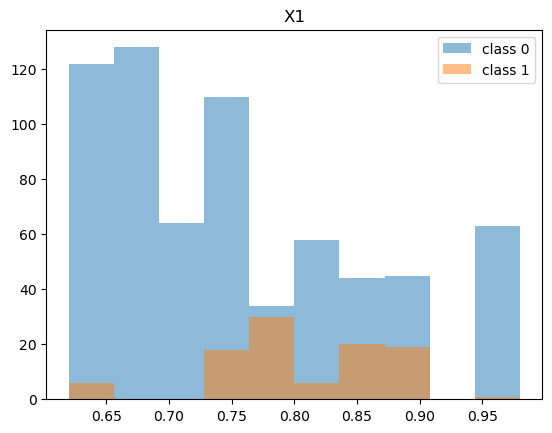

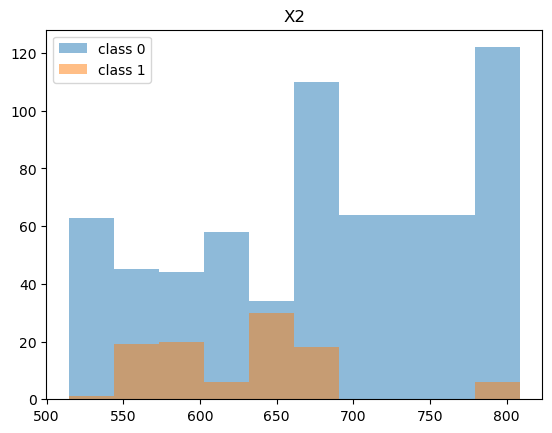

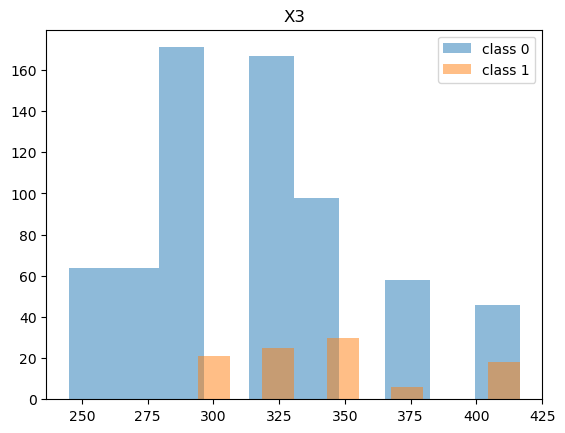

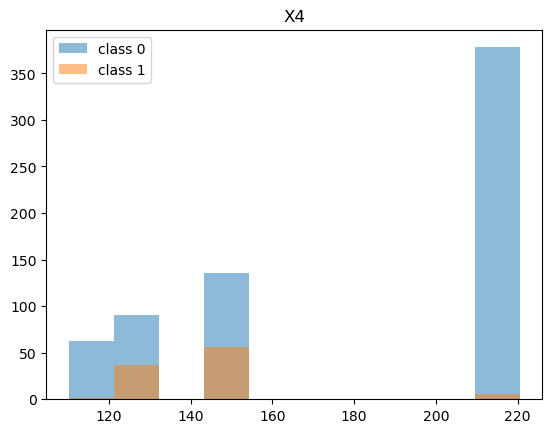

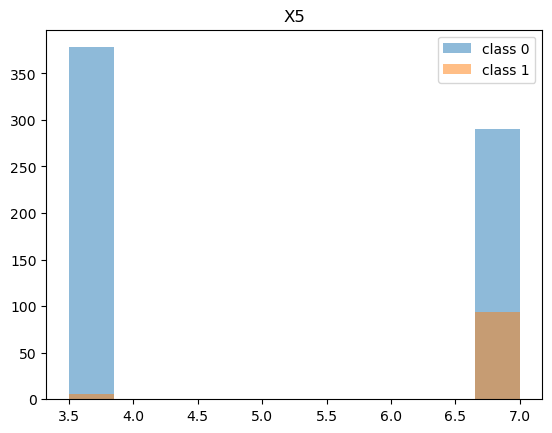

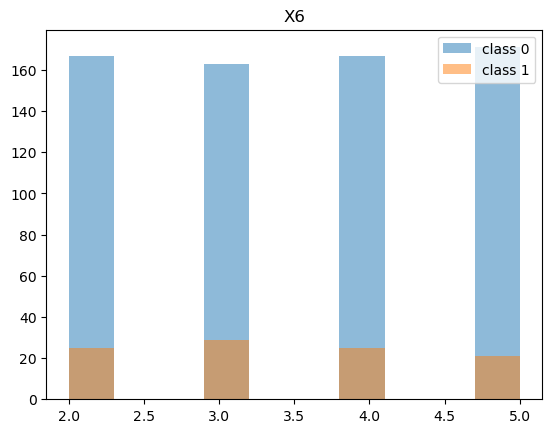

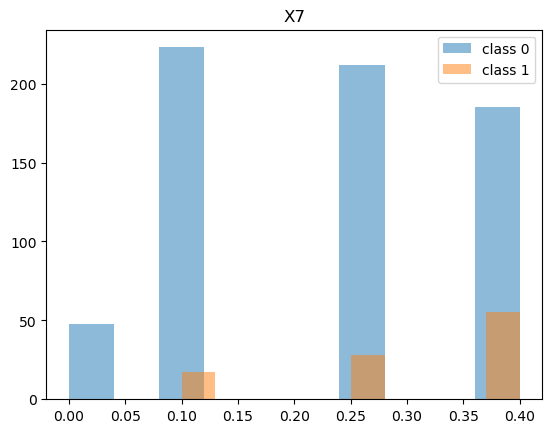

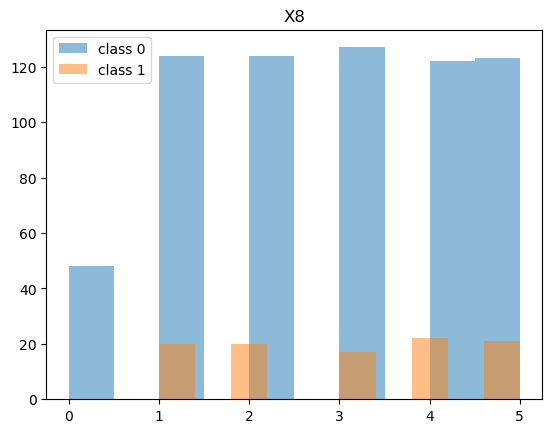

In [3]:
#read xlsx file
data2 = pd.read_excel('ENB2012_data.xlsx')
#add class column, 1 if Y1 - Y2 > 0, 0 otherwise
data2['class'] = np.where(data2['Y1'] - data2['Y2'] > 0, 1, 0)
#pair histogram for each variable and class
for i in range(8):
    plt.figure()
    plt.hist(data2.iloc[:, i][data2['class'] == 0], label='class 0', alpha=0.5)
    plt.hist(data2.iloc[:, i][data2['class'] == 1], label='class 1', alpha=0.5)
    plt.legend()
    plt.title(data2.columns[i])

X8 has the most classification power due to its distinct distribution.

(2) Build a logistic regression model using all of predictors (no basis function) and discuss your model outcome (predicted weights, and classifier accuracy). 

In [4]:
# Define the sigmoid function
def sigmoid(z):
    '''
    This function computes the sigmoid function
    Input: z - vector of values
    Output: sigmoid(z) - sigmoid function of z
    '''
    return 1 / (1 + np.exp(-z))

# Define the cost function and its gradient
def cost_function(w, X, y):
    '''
    This function computes the cost and gradient of the logistic regression
    Input: w - vector of weights
    X - matrix of independent variables where each row is a data point
    y - vector of predicted variable
    Output: cost - cost of the logistic regression
    gradient - gradient of the cost function
    '''
    y_pred = sigmoid(np.dot(X, w))
    cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    gradient = np.dot(X.T, y_pred - y) / X.shape[0]
    return cost, gradient

def gradient_ascent(w, X, y, alpha, max_iter):
    '''
    This function performs gradient ascent to find the maximum likelihood estimates of the weights
    Input: w - vector of weights
    X - matrix of independent variables where each row is a data point
    y - vector of predicted variable
    alpha - learning rate
    max_iter - maximum number of iterations
    Output: w - vector of weights
    '''
    for i in range(max_iter):
        cost, gradient = cost_function(w, X, y)
        w = w + alpha * gradient
    return w

#prepare the data
X = data2.iloc[:, 0:8].values
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = data2['class'].values
# Initialize the weights
w = np.zeros(X.shape[1])
# Find the maximum likelihood estimates of the weights
w = gradient_ascent(w, X, y, alpha=0.0001, max_iter=100)
# Predict the response for the test data
y_pred = sigmoid(np.dot(X, w))
y_pred = 1-(y_pred > 0.5).astype(int)
# Compute the classifier accuracy
acc = np.mean(y_pred == y)
print("regression equation: ln p(y=1|x) = ", w[0], " + ", w[1], "x1 + ", w[2], "x2 + ", w[3], "x3 + ", w[4], "x4 + ", w[5], "x5 + ", w[6], "x6 + ", w[7], "x7 + ", w[8], "x8")
print("Accuracy:", acc)

regression equation: ln p(y=1|x) =  0.008647916666283683  +  0.006544864582970855 x1 +  5.869383333128208 x2 +  2.7246934894688057 x3 +  1.572344921829704 x4 +  0.043396354164002206 x5 +  0.030371874998659554 x6 +  0.001932291666576908 x7 +  0.024026041665589627 x8
Accuracy: 0.8697916666666666


/var/folders/10/9qzh5w8j4l7726t9c8nv50j00000gn/T/ipykernel_86646/423341253.py:21: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
/var/folders/10/9qzh5w8j4l7726t9c8nv50j00000gn/T/ipykernel_86646/423341253.py:21: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


(3) Using estimated weights in part 2, we have probability of two classes for each data point. Plot ROC curve for different threshold values (probability of class 1 larger than threshold, you will assign to 
class 1). Plot the accuracy as a function of threshold too.

In [ ]:
#SKIP

(4) Build a Bayesian regression model using all of predictors (no basis function) and discuss your model outcome (predicted weights and their confidence interval). Assume the prior is defined by $\mathcal{N}(\mathbf{0},\alpha\mathbf{I})$, where $\alpha$ is the hyperparameter. Discuss the result for $\alpha_1 = 0.1,\alpha_2 =1, \alpha_3 = 10$  and $\alpha_4 = 100$.  

In [17]:
def bayesian_logistic_regression(X, t, alpha):
    '''
    This function performs Bayesian logistic regression
    Input: X - matrix of independent variables where each row is a data point
    t - vector of predicted variable
    alpha - precision parameter
    Output: mu - posterior mean
    cov - posterior covariance
    '''
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    N, M = X.shape
    A = np.linalg.inv(alpha * np.eye(M) + np.dot(X.T, X))
    mu = np.dot(A, np.dot(X.T, t))
    cov = A
    return mu, cov

def predict(X, mu, cov):
    '''
    This function computes the posterior predictive distribution
    Input: X - matrix of independent variables where each row is a data point
    mu - posterior mean
    cov - posterior covariance
    Output: p - posterior predictive distribution
    '''
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    z = np.dot(X, mu)
    return sigmoid(z)

#prepare the data
X = data2.iloc[:, 0:8].values
y = data2['class'].values
# Find the maximum likelihood estimates of the weights
for alpha in [0.1, 1, 10, 100]:
    w, cov = bayesian_logistic_regression(X, y, alpha)
    n_samples = 100
    w_samples = np.random.multivariate_normal(mean=w, cov=cov, size=n_samples)
    lower = np.percentile(w_samples, 2.5, axis=0)
    upper = np.percentile(w_samples, 97.5, axis=0)
    confidence_interval = np.array([lower, upper]).T
    print("regression equation: ln p(y=1|x) = ", w[0], " + ", w[1], "x1 + ", w[2], "x2 + ", w[3], "x3 + ", w[4], "x4 + ", w[5], "x5 + ", w[6], "x6 + ", w[7], "x7 + ", w[8], "x8")
    print("conf:", confidence_interval)

regression equation: ln p(y=1|x) =  -0.4301178812875803  +  -0.9165569881839287 x1 +  0.0006409422625581738 x2 +  -0.0007672946652252031 x3 +  0.0007041190956578248 x4 +  0.16190120701259572 x5 +  -0.008489262873560242 x6 +  0.5222157104601727 x7 +  0.0027121831318622676 x8
conf: [[-4.99407518  4.13229415]
 [-3.7319476   2.2111775 ]
 [-2.2258392   2.28108875]
 [-2.28160051  2.22215066]
 [-4.55961012  4.4453407 ]
 [-0.01178271  0.29891391]
 [-0.0813613   0.03928554]
 [-0.05090483  1.04847143]
 [-0.04194621  0.05176222]]
regression equation: ln p(y=1|x) =  -0.37212416438753887  +  -0.7104769604938458 x1 +  0.0004634773850047863 x2 +  -0.0004345295747067132 x3 +  0.0004490035189333279 x4 +  0.1344232373179475 x5 +  -0.00967995266758434 x6 +  0.48433469049289224 x7 +  0.00290200706023409 x8
conf: [[-2.09749524  1.42459113]
 [-2.04540251  0.73133378]
 [-0.81485571  0.81442668]
 [-0.8135206   0.81473144]
 [-1.62874318  1.6294757 ]
 [-0.00721815  0.27051868]
 [-0.05206248  0.06163618]
 [-0.07

(5) Do 10-fold cross validation for four different models you examined in part 4 and discuss which one has the highest decision accuracy. In the prediction step, use $W_{MAP}$. 

In [19]:
#cross validation
def cross_validation(X, y, alpha, k):
    '''
    This function performs k-fold cross validation
    Input: X - matrix of independent variables where each row is a data point
    y - vector of predicted variable
    alpha - precision parameter
    k - number of folds
    Output: acc - accuracy
    '''
    n_samples = X.shape[0]
    n_test = int(n_samples / k)
    acc = 0
    for i in range(k):
        X_test = X[i * n_test:(i + 1) * n_test]
        #add bias
        X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))
        y_test = y[i * n_test:(i + 1) * n_test]
        X_train = np.vstack((X[0:i * n_test], X[(i + 1) * n_test:]))
        y_train = np.hstack((y[0:i * n_test], y[(i + 1) * n_test:]))
        w, _ = bayesian_logistic_regression(X_train, y_train, alpha)
        y_pred = sigmoid(np.dot(X_test, w))
        y_pred = 1-(y_pred > 0.5).astype(int)
        acc += np.mean(y_pred == y_test)
    return acc / k

#prepare the data
X = data2.iloc[:, 0:8].values
y = data2['class'].values
# Find the maximum likelihood estimates of the weights
for alpha in [0.1, 1, 10, 100]:
    w, cov = bayesian_logistic_regression(X, y, alpha)
    acc = cross_validation(X, y, alpha, k=5)
    print("Accuracy:", acc)

Accuracy: 0.6431372549019608
Accuracy: 0.6627450980392157
Accuracy: 0.7437908496732026
Accuracy: 0.7816993464052289


More alpha, more accuracy

(6) We want to calculate 
$$
p(y=1|\phi,\mathbf{t}) = \int p(y=1|\phi,\mathbf{w})p(\mathbf{w}|\mathbf{t})d\mathbf{w}
$$
using sampling technique (this is equation 4.145 from the Bishop text book). We derived a 
Gaussian approximation solution for 𝑝(w|𝐭), where we can draw samples from it. We can then 
take these samples to calculate the probability. This is defined by: 
$$
p(y=1|\phi,\mathbf{t}) \approx \frac{1}{S}\sum_{s=1}^S p(y=1|\phi,\mathbf{w}_s)
$$
where $\mathbf{w}_s$ is the sample drawn from the posterior. For
$$
\begin{align*}
X_1 &= (0.8,600.0,286.0,138.1,5,4,0.25,0)\\
X_2 &=(0.67,630.0,296.0,238.1,2,6,0.5,3) 
\end{align*}
$$
Calculate probability for the models you built in part 4 for different $\alpha$ s. 